In [ ]:
!pip install -U sentence-transformers

## **Training Overview**

SentenceTransformers was designed in such way that fine-tuning your own sentence / text embeddings models is easy. It provides most of the building blocks that you can stick together to tune embeddings for your specific task.

# **Network Architecture**
A SentenceTransformer model is designed to process input sentences or text and generate a fixed-sized output representation, typically represented as a vector denoted as 'u.' This document provides a concise overview of the key components involved in this process.

Components:

1. **Input Text:** The model takes an input sentence or text for processing.

2. **Transformer Network (BERT):** The input is passed through a transformer network, such as BERT. BERT generates contextualized word embeddings for all tokens in the input text.

3. **Pooling Layer:** To obtain a fixed-sized output representation (vector 'u'), a pooling layer is employed. Various pooling options are available, with the simplest being mean-pooling. In mean-pooling, the contextualized word embeddings from BERT are averaged, resulting in a fixed 768-dimensional output vector. Importantly, this output vector's dimension remains constant regardless of the input text's length.

4. **Final Model:** The architecture depicted, consisting of a BERT layer followed by a pooling layer, constitutes the SentenceTransformer model. This model is capable of converting variable-length input text into a consistent and informative fixed-sized representation for downstream tasks.

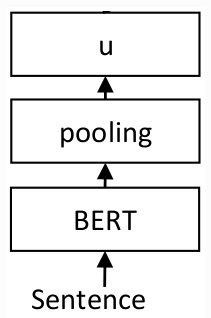



# **Creating Networks from Scratch**

* Define layers: Set 'bert-base-uncased' as the word_embedding_model and limit it to a max sequence length of 256, truncating longer texts.
* Create a pooling layer: Implement a mean pooling layer.
* Build a SentenceTransformer model: Use SentenceTransformer(modules=[word_embedding_model, pooling_model]).
* Sequential execution: Input text goes through word_embedding_model first, followed by pooling_model.
* Obtain sentence embedding: The model returns the final sentence embedding.



In [3]:
from sentence_transformers import SentenceTransformer, models

word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

In [5]:
from sentence_transformers import SentenceTransformer, models
from torch import nn

word_embedding_model = models.Transformer('bert-base-uncased', max_seq_length=256)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension())
dense_model = models.Dense(in_features=pooling_model.get_sentence_embedding_dimension(), out_features=256, activation_function=nn.Tanh())

model = SentenceTransformer(modules=[word_embedding_model, pooling_model, dense_model])

we add on top of the pooling layer a fully connected dense layer with Tanh activation, which performs a down-project to 256 dimensions. Hence, embeddings by this model will only have 256 instead of 768 dimensions.

# **Training Data**

In [6]:
from sentence_transformers import SentenceTransformer, InputExample
from torch.utils.data import DataLoader

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
train_examples = [InputExample(texts=['My first sentence', 'My second sentence'], label=0.8),
   InputExample(texts=['Another pair', 'Unrelated sentence'], label=0.3)]
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)

# **Loss Functions**

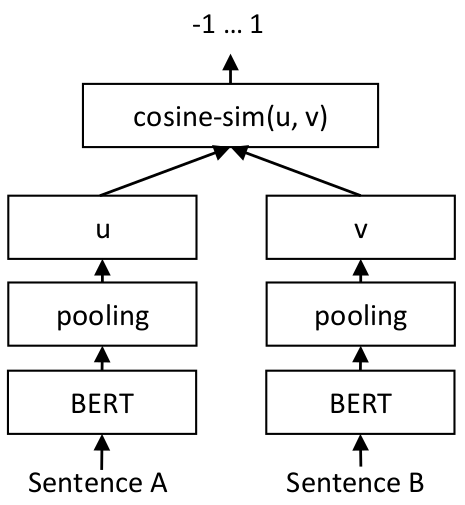

For each sentence pair, we pass sentence A and sentence B through our network which yields the embeddings u und v. The similarity of these embeddings is computed using cosine similarity and the result is compared to the gold similarity score. This allows our network to be fine-tuned and to recognize the similarity of sentences.

In [7]:
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader

#Define the model Either from scratch of by loading a pre-trained model
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

#Define your train examples. You need more than just two examples...
train_examples = [InputExample(texts=['My first sentence', 'My second sentence'], label=0.8),
    InputExample(texts=['Another pair', 'Unrelated sentence'], label=0.3)]

#Define your train dataset, the dataloader and the train loss
train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16)
train_loss = losses.CosineSimilarityLoss(model)

#Tune the model
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=1, warmup_steps=100)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1 [00:00<?, ?it/s]

## **Evaluators**

In [8]:
from sentence_transformers import evaluation
sentences1 = ['This list contains the first column', 'With your sentences', 'You want your model to evaluate on']
sentences2 = ['Sentences contains the other column', 'The evaluator matches sentences1[i] with sentences2[i]', 'Compute the cosine similarity and compares it to scores[i]']
scores = [0.3, 0.6, 0.2]

evaluator = evaluation.EmbeddingSimilarityEvaluator(sentences1, sentences2, scores)
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=1, warmup_steps=100, evaluator=evaluator, evaluation_steps=500)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1 [00:00<?, ?it/s]

## **Continue Training on Other Data**

In [9]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
train_dataloader = DataLoader(train_samples, shuffle=True, batch_size=train_batch_size)
train_loss = losses.CosineSimilarityLoss(model=model)

evaluator = EmbeddingSimilarityEvaluator.from_input_examples(sts_reader.get_examples('sts-dev.csv'))